In [16]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, UpSampling2D, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt


In [17]:
(X_train, _), (X_test, _) = mnist.load_data()        # 이미지만 사용하기 때문에 X_train 만 호출

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255


In [18]:
# 오토인코더 -> 인코딩 : Conv -> MaxPooling -> Conv -> MaxPooling -> Conv
# 디코딩 : Conv -> UpSampling -> Conv -> UpSampling -> Conv

In [23]:
# 인코딩
model = Sequential()
model.add(Conv2D(16, 3, input_shape=(28, 28, 1), padding='same', activation='relu'))  
model.add(MaxPooling2D(2, padding='same'))                                                       
model.add(Conv2D(8, 3, padding='same', activation='relu'))                           
model.add(MaxPooling2D(2, padding='same'))                                                       
model.add(Conv2D(8, 3, strides=2, padding='same', activation='relu'))                           

# 디코딩
model.add(Conv2D(8, 3, padding='same', activation='relu'))     
model.add(UpSampling2D())                      
model.add(Conv2D(8, 3, padding='same', activation='relu'))     
model.add(UpSampling2D())                      
model.add(Conv2D(16, 3, activation='relu'))                           
model.add(UpSampling2D()) 
model.add(Conv2D(1, 3, padding='same', activation='sigmoid'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_30 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 conv2d_31 (Conv2D)          (None, 4, 4, 8)          

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train, X_train, epochs=50, batch_size=128,
                validation_data = (X_test, X_test))

Epoch 1/50
469/469 [==============================] - 65s 134ms/step - loss: 0.2089 - val_loss: 0.1375
Epoch 2/50
469/469 [==============================] - 60s 128ms/step - loss: 0.1264 - val_loss: 0.1163
Epoch 3/50
469/469 [==============================] - 59s 126ms/step - loss: 0.1131 - val_loss: 0.1082
Epoch 4/50
469/469 [==============================] - 60s 127ms/step - loss: 0.1071 - val_loss: 0.1037
Epoch 5/50
469/469 [==============================] - 60s 127ms/step - loss: 0.1033 - val_loss: 0.1007
Epoch 6/50
469/469 [==============================] - 69s 146ms/step - loss: 0.1007 - val_loss: 0.0989
Epoch 7/50
469/469 [==============================] - 70s 150ms/step - loss: 0.0987 - val_loss: 0.0969
Epoch 8/50
469/469 [==============================] - 66s 141ms/step - loss: 0.0971 - val_loss: 0.0950
Epoch 9/50
469/469 [==============================] - 60s 127ms/step - loss: 0.0954 - val_loss: 0.0939
Epoch 10/50
469/469 [==============================] - 61s 130ms/step - l

313/313 [==============================] - 6s 17ms/step


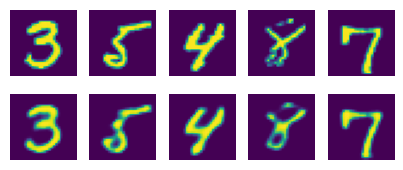

In [25]:
# 학습된 결과 출력
random_test = np.random.randint(X_test.shape[0], size=5)

# 테스트할 이미지를 랜덤으로 호출
ae_imgs = model.predict(X_test)

plt.figure(figsize=(7, 2))

for i, image_idx in enumerate(random_test):
    ax = plt.subplot(2, 7, i+1)
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7+i+1)
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    ax.axis('off')
plt.show()
    